# Задание лабораторной работы

-	Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
-	Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи: обработку пропусков в данных; кодирование категориальных признаков; масштабирование данных.

# Ячейки Jupyter-ноутбука

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные по продажам автомобилей в США. Данный набор доступен по адресу: https://www.kaggle.com/datasets/gagandeep16/car-sales

Набор данных имеет следующие атрибуты:

- Manufacturer - марка
- Model - модель
- Sales_in_thousands - продажи в тысячах
- year_resale_value - годовой объем продаж
- Vehicle_type - тип автомобиля
- Price_in_thousands - цена в тысячах
- Engine_size - объем двигателя
- Horsepower - лошадиные силы
- Wheelbase - колесная база
- Width - ширина
- Length - длина
- Curb_weight - масса
- Fuel_capacity - топливный бак
- Fuel_efficiency - расход топлива
- Latest_Launch - начало производства модели
- Power_perf_factor - мощностной коэффициент

### Импорт библиотек

Импортируем библиотеки с помощью команды import:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

Загрузим набор данных:

In [2]:
data = pd.read_csv('Car_sales.csv')

## Первичный анализ данных

Выведем первые 5 строк датасета:

In [3]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


Определим размер датасета:

In [4]:
data.shape

(157, 16)

В датасете 157 строк и 16 столбцов. Определим тип столбцов:

In [5]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

Проверим наличие пропусков:

In [6]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

Видим, что пропуски наблюдаются в множестве столбцов.

## Обработка пропусков данных

Удалим колонки, содержащие пустые значения:

In [7]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((157, 16), (157, 5))

Выведем первые строки датасета на экран:

In [8]:
data_new_1

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Latest_Launch
0,Acura,Integra,16.919,Passenger,2/2/2012
1,Acura,TL,39.384,Passenger,6/3/2011
2,Acura,CL,14.114,Passenger,1/4/2012
3,Acura,RL,8.588,Passenger,3/10/2011
4,Audi,A4,20.397,Passenger,10/8/2011
...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,9/21/2011
153,Volvo,S70,15.245,Passenger,11/24/2012
154,Volvo,V70,17.531,Passenger,6/25/2011
155,Volvo,C70,3.493,Passenger,4/26/2011


Удалим строки, содержащие пустые значения:

In [9]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((157, 16), (117, 16))

In [10]:
data_new_2.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


Заполним все пропущенные значения нулями:

In [11]:
data_new_3 = data.fillna(0)

Выведем на экран:

In [12]:
data_new_3.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,0.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,0.000000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Импьютация данных

### Обработка пропусков в числовых данных

Выберем числовые столбцы с пропущенными значениями и посчитаем количество пустых значений:

In [13]:
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Столбец __year_resale_value. Тип данных float64. Количество пустых значений 36, 22.93%.
Столбец Price_in_thousands. Тип данных float64. Количество пустых значений 2, 1.27%.
Столбец Engine_size. Тип данных float64. Количество пустых значений 1, 0.64%.
Столбец Horsepower. Тип данных float64. Количество пустых значений 1, 0.64%.
Столбец Wheelbase. Тип данных float64. Количество пустых значений 1, 0.64%.
Столбец Width. Тип данных float64. Количество пустых значений 1, 0.64%.
Столбец Length. Тип данных float64. Количество пустых значений 1, 0.64%.
Столбец Curb_weight. Тип данных float64. Количество пустых значений 2, 1.27%.
Столбец Fuel_capacity. Тип данных float64. Количество пустых значений 1, 0.64%.
Столбец Fuel_efficiency. Тип данных float64. Количество пустых значений 3, 1.91%.
Столбец Power_perf_factor. Тип данных float64. Количество пустых значений 2, 1.27%.


Отфильтруем по столбцам:

In [14]:
data_num = data[num_cols]
data_num

,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


Гистограмма по признакам:

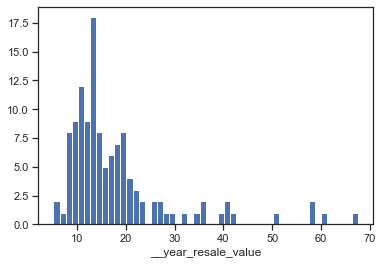

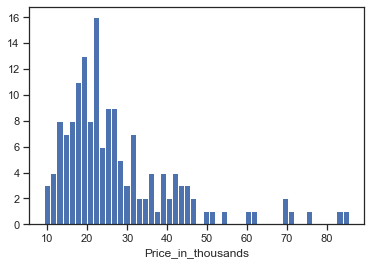

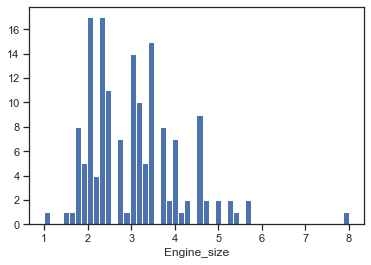

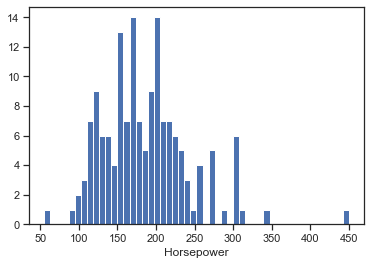

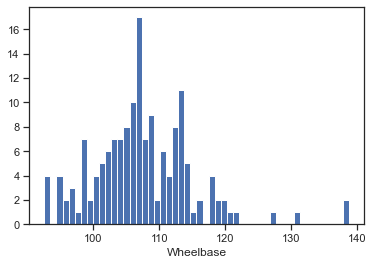

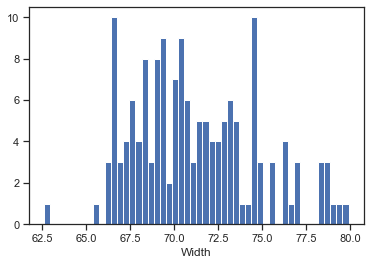

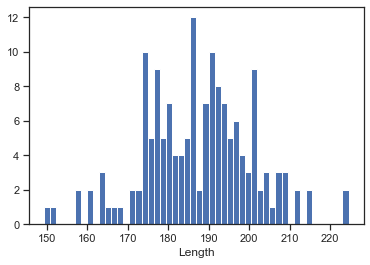

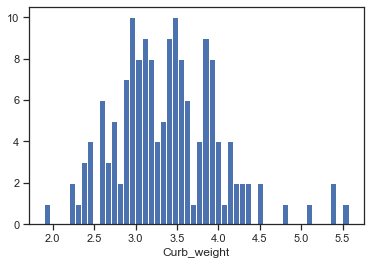

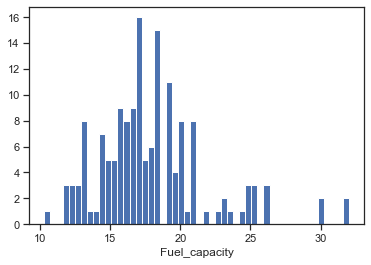

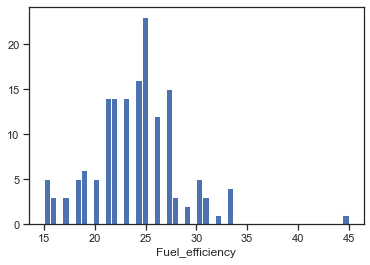

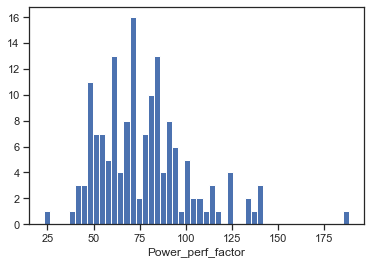

In [15]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn, доступные по адресу: https://scikit-learn.org/stable/modules/impute.html

In [16]:
data_num_pit = data_num[['Price_in_thousands']]

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

Фильтр для проверки заполнения пустых значений:

In [18]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_pit)
mask_missing_values_only

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Проведем импьютацию различными показателями центра распределения:

In [19]:
strategies=['mean', 'median', 'most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_pit)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean', array([27.39075484, 27.39075484]))

In [22]:
strategies[1], test_num_impute(strategies[1])

('median', array([22.799, 22.799]))

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([12.64, 12.64]))

Создадим функцию, позволяющую задавать столбец и вид импьютации:

In [24]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

Проверим работу функции по продажам автомобилей:

In [25]:
data[['__year_resale_value']].describe()

,__year_resale_value
count,121.000000
mean,18.072975
std,11.453384
min,5.160000
25%,11.260000
50%,14.180000
75%,19.875000
max,67.550000


In [26]:
test_num_impute_col(data, '__year_resale_value', strategies[0])

('__year_resale_value', 'mean', 36, 18.07297520661157, 18.07297520661157)

In [27]:
test_num_impute_col(data, '__year_resale_value', strategies[1])

('__year_resale_value', 'median', 36, 14.18, 14.18)

In [28]:
test_num_impute_col(data, '__year_resale_value', strategies[2])

('__year_resale_value', 'most_frequent', 36, 7.75, 7.75)

### Обработка пропусков в категориальных данных

Так как в датасете нет пропусков среди столбца "Производитель", то искуственно подправим датасет и загрузим его:

In [29]:
data_mod = pd.read_csv('Car_sales_mod.csv')

Проверим категориальный признак:

In [30]:
cat_cols = []
for col in data.columns:
    temp_null_count = data_mod[data_mod[col].isnull()].shape[0]
    dt = str(data_mod[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Столбец {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Столбец Manufacturer. Тип данных object. Количество пустых значений 15, 9.55%.


Его и будем использовать:

In [31]:
cat_temp_data = data_mod[['Manufacturer']]
cat_temp_data.head()

,Manufacturer
0,Acura
1,Acura
2,Acura
3,Acura
4,Audi


In [32]:
cat_temp_data['Manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', nan,
       'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep',
       'Lexus', 'Mitsubishi', 'Mercury', 'Mercedes-B', 'Nissan',
       'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [33]:
cat_temp_data[cat_temp_data['Manufacturer'].isnull()].shape

(15, 1)

Импьютация наиболее частыми значениями:

In [34]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Acura'],
       ['Acura'],
       ['Acura'],
       ['Acura'],
       ['Audi'],
       ['Audi'],
       ['Audi'],
       ['BMW'],
       ['BMW'],
       ['BMW'],
       ['Buick'],
       ['Buick'],
       ['Buick'],
       ['Buick'],
       ['Cadillac'],
       ['Cadillac'],
       ['Cadillac'],
       ['Cadillac'],
       ['Cadillac'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Fo

In [35]:
np.unique(data_imp2)

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Dodge',
       'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus',
       'Mercedes-B', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

Наблюдаем отсутствие пустых значений.

Импьютация константой:

In [36]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='???')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Acura'],
       ['Acura'],
       ['Acura'],
       ['Acura'],
       ['Audi'],
       ['Audi'],
       ['Audi'],
       ['BMW'],
       ['BMW'],
       ['BMW'],
       ['Buick'],
       ['Buick'],
       ['Buick'],
       ['Buick'],
       ['Cadillac'],
       ['Cadillac'],
       ['Cadillac'],
       ['Cadillac'],
       ['Cadillac'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['Chevrolet'],
       ['???'],
       ['???'],
       ['???'],
       ['???'],
       ['???'],
       ['???'],
       ['???'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Dodge'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       ['Ford'],
       [

In [37]:
np.unique(data_imp3)

array(['???', 'Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep',
       'Lexus', 'Mercedes-B', 'Mercury', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [38]:
data_imp3[data_imp3==0].size

0

Значения были заменены на "???".

### Преобразование категориальных признаков в числовые

In [39]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Acura
1,Acura
2,Acura
3,Acura
4,Audi
...,...
152,Volvo
153,Volvo
154,Volvo
155,Volvo


## Кодирование категорий целочисленными значениями

### LabelEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
cat_enc['c1'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Dodge',
       'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus',
       'Mitsubishi', 'Mercury', 'Mercedes-B', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [42]:
le = LabelEncoder()

In [43]:
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [44]:
le.classes_

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Dodge',
       'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus',
       'Mercedes-B', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [45]:
cat_enc_le

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 11, 12,
       12, 12, 13, 13, 13, 13, 13, 13,  6,  6,  6, 16, 16, 16, 16, 16, 16,
       16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17,
       17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 22, 22,  6,  6,  6,  6,  6, 23, 23,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26,
       26, 26, 26, 26])

In [46]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [47]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Dodge',
       'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Lexus',
       'Mercedes-B', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

### OrdinalEncoder

In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
data_oe = data_mod[['Manufacturer', 'Model']]
data_oe.head()

,Manufacturer,Model
0,Acura,Integra
1,Acura,TL
2,Acura,CL
3,Acura,RL
4,Audi,A4


In [50]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='???')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Acura', 'Integra'],
       ['Acura', 'TL'],
       ['Acura', 'CL'],
       ['Acura', 'RL'],
       ['Audi', 'A4'],
       ['Audi', 'A6'],
       ['Audi', 'A8'],
       ['BMW', '323i'],
       ['BMW', '328i'],
       ['BMW', '528i'],
       ['Buick', 'Century'],
       ['Buick', 'Regal'],
       ['Buick', 'Park Avenue'],
       ['Buick', 'LeSabre'],
       ['Cadillac', 'DeVille'],
       ['Cadillac', 'Seville'],
       ['Cadillac', 'Eldorado'],
       ['Cadillac', 'Catera'],
       ['Cadillac', 'Escalade'],
       ['Chevrolet', 'Cavalier'],
       ['Chevrolet', 'Malibu'],
       ['Chevrolet', 'Lumina'],
       ['Chevrolet', 'Monte Carlo'],
       ['Chevrolet', 'Camaro'],
       ['Chevrolet', 'Corvette'],
       ['Chevrolet', 'Prizm'],
       ['Chevrolet', 'Metro'],
       ['Chevrolet', 'Impala'],
       ['???', 'Sebring Coupe'],
       ['???', 'Sebring Conv.'],
       ['???', 'Concorde'],
       ['???', 'Cirrus'],
       ['???', 'LHS'],
       ['???', 'Town & Country'],
       

In [51]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[  1.,  79.],
       [  1., 143.],
       [  1.,  25.],
       [  1., 115.],
       [  2.,   8.],
       [  2.,   9.],
       [  2.,  10.],
       [  3.,   3.],
       [  3.,   4.],
       [  3.,   7.],
       [  4.,  38.],
       [  4., 121.],
       [  4., 107.],
       [  4.,  89.],
       [  5.,  51.],
       [  5., 137.],
       [  5.,  58.],
       [  5.,  35.],
       [  5.,  59.],
       [  6.,  36.],
       [  6.,  92.],
       [  6.,  90.],
       [  6.,  97.],
       [  6.,  30.],
       [  6.,  46.],
       [  6., 111.],
       [  6.,  94.],
       [  6.,  78.],
       [  0., 135.],
       [  0., 134.],
       [  0.,  42.],
       [  0.,  40.],
       [  0.,  83.],
       [  0., 146.],
       [  0.,   2.],
       [  7., 104.],
       [  7.,  17.],
       [  7., 141.],
       [  7.,  80.],
       [  7., 151.],
       [  7., 117.],
       [  7., 119.],
       [  7., 118.],
       [  7.,  50.],
       [  7.,  53.],
       [  7.,  32.],
       [  8.,  60.],
       [  8.,

Уникальные значения столбца "Производитель":

In [52]:
np.unique(cat_enc_oe[:, 0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27.])

Уникальные значения столбца "Модель":

In [53]:
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Все значения:

In [54]:
oe.categories_

[array(['???', 'Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
        'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep',
        'Lexus', 'Mercedes-B', 'Mercury', 'Mitsubishi', 'Nissan',
        'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab', 'Subaru',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['3-Sep', '3000GT', '300M', '323i', '328i', '4Runner', '5-Sep',
        '528i', 'A4', 'A6', 'A8', 'Accent', 'Accord', 'Alero', 'Altima',
        'Aurora', 'Avalon', 'Avenger', 'Beetle', 'Bonneville', 'Boxter',
        'Bravada', 'Breeze', 'C-Class', 'C70', 'CL', 'CL500', 'CLK Coupe',
        'CR-V', 'Cabrio', 'Camaro', 'Camry', 'Caravan', 'Carrera Cabrio',
        'Carrera Coupe', 'Catera', 'Cavalier', 'Celica', 'Century',
        'Cherokee', 'Cirrus', 'Civic', 'Concorde', 'Continental',
        'Contour', 'Corolla', 'Corvette', 'Cougar', 'Crown Victoria',
        'Cutlass', 'Dakota', 'DeVille', 'Diamante', 'Durango', 'E-Class',
        'ES

In [55]:
oe.inverse_transform(cat_enc_oe)

array([['Acura', 'Integra'],
       ['Acura', 'TL'],
       ['Acura', 'CL'],
       ['Acura', 'RL'],
       ['Audi', 'A4'],
       ['Audi', 'A6'],
       ['Audi', 'A8'],
       ['BMW', '323i'],
       ['BMW', '328i'],
       ['BMW', '528i'],
       ['Buick', 'Century'],
       ['Buick', 'Regal'],
       ['Buick', 'Park Avenue'],
       ['Buick', 'LeSabre'],
       ['Cadillac', 'DeVille'],
       ['Cadillac', 'Seville'],
       ['Cadillac', 'Eldorado'],
       ['Cadillac', 'Catera'],
       ['Cadillac', 'Escalade'],
       ['Chevrolet', 'Cavalier'],
       ['Chevrolet', 'Malibu'],
       ['Chevrolet', 'Lumina'],
       ['Chevrolet', 'Monte Carlo'],
       ['Chevrolet', 'Camaro'],
       ['Chevrolet', 'Corvette'],
       ['Chevrolet', 'Prizm'],
       ['Chevrolet', 'Metro'],
       ['Chevrolet', 'Impala'],
       ['???', 'Sebring Coupe'],
       ['???', 'Sebring Conv.'],
       ['???', 'Concorde'],
       ['???', 'Cirrus'],
       ['???', 'LHS'],
       ['???', 'Town & Country'],
       

### Кодирование шкал порядка

Для кодирования шкал порядка воспользуемся функцией map:

In [56]:
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [57]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [58]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [59]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


### Кодирование категорий наборами бинарных значений - one-hot encoding

Каждое уникальное значение признака становится новым отдельным признаком:

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [62]:
cat_enc.shape

(157, 1)

In [63]:
cat_enc_ohe.shape

(157, 27)

In [64]:
cat_enc_ohe

<157x27 sparse matrix of type '<class 'numpy.float64'>'
	with 157 stored elements in Compressed Sparse Row format>

In [65]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0

In [66]:
cat_enc.head(10)

,c1
0,Acura
1,Acura
2,Acura
3,Acura
4,Audi
5,Audi
6,Audi
7,BMW
8,BMW
9,BMW


In [67]:
pd.get_dummies(cat_enc).head()

,c1_Acura,c1_Audi,c1_BMW,c1_Buick,c1_Cadillac,c1_Chevrolet,c1_Dodge,c1_Ford,c1_Honda,c1_Hyundai,...,c1_Nissan,c1_Oldsmobile,c1_Plymouth,c1_Pontiac,c1_Porsche,c1_Saab,c1_Subaru,c1_Toyota,c1_Volkswagen,c1_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Manufacturer_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

Масштабирование предполагает изменение диапазона измерения величины. Применяют MinMax масштабирование и масштабирование данных на основе Z-оценки.

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [70]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price_in_thousands']])

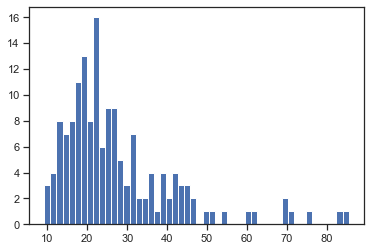

In [71]:
plt.hist(data['Price_in_thousands'], 50)
plt.show()

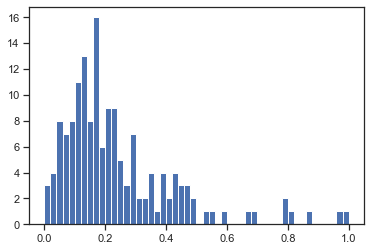

In [72]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки

In [73]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price_in_thousands']])

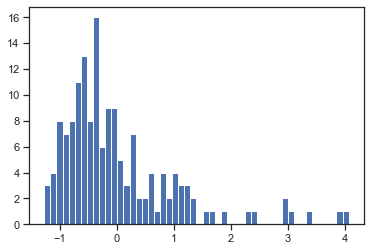

In [74]:
plt.hist(sc2_data, 50)
plt.show()